## Datenanalyse
- get an exampletory np_array
- get a feeling for its structure 
- try scipy methods
- simulate the example np_array with an np_array of your own making
- build a connection to the Fit-Gauss result

In [2]:
#einmalig ausführen 
#!{sys.executable} -m pip install scipy
#!{sys.executable} -m pip install sklearn

In [3]:
from matplotlib import pyplot as plt
import numpy as np

load example np_array and plot it

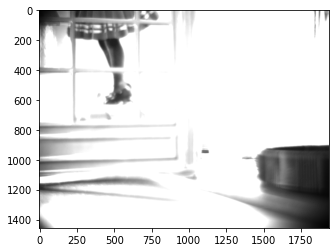

In [4]:
with open('test.npy', 'rb') as f:
    example_np_a = np.load(f)
plt.imshow(example_np_a, cmap='gray')
plt.show()

### example array structure

In [5]:
example_np_a.shape

(1456, 1936, 1)

In [6]:
#better shape for example_np_a would be (1456,1936)

#trying out reshaping:
test_a = np.arange(12).reshape(6,2,1)
print(test_a)
reshape_a = test_a.reshape(6,2)
reshape_a

[[[ 0]
  [ 1]]

 [[ 2]
  [ 3]]

 [[ 4]
  [ 5]]

 [[ 6]
  [ 7]]

 [[ 8]
  [ 9]]

 [[10]
  [11]]]


array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [7]:
reshape_example_np_a = example_np_a.reshape(1456, 1936)
print (reshape_example_np_a.shape)
print (reshape_example_np_a)

(1456, 1936)
[[ 12  12  12 ... 170 177 172]
 [ 11  12  12 ... 180 186 173]
 [ 12  12  12 ... 187 189 174]
 ...
 [ 45  46  47 ...  11  12  11]
 [ 44  45  47 ...  11  11  12]
 [ 42  46  45 ...  11  11  10]]


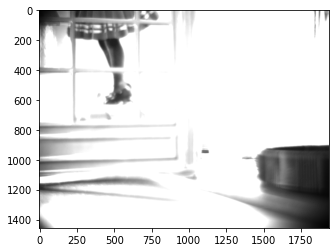

In [8]:
plt.imshow(reshape_example_np_a, cmap='gray')
plt.show()

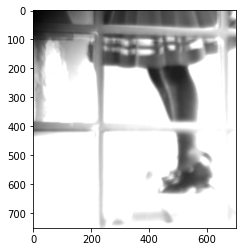

In [9]:
#obere linke Ecke ausgeben 
top_left_corner = reshape_example_np_a[0:750, 0:700]
plt.imshow(top_left_corner, cmap='gray')
plt.show()

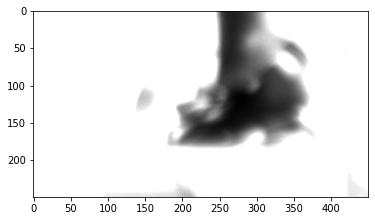

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 240, 242, 244],
       [255, 255, 255, ..., 243, 236, 240],
       [255, 255, 255, ..., 239, 242, 241]], dtype=uint8)

In [10]:
#einen Bereich in der Mitte ausgeben 
def np_area (twoD_np_a, x_tl, y_tl, x_br, y_br): #tl -top_left, br -bottom right -> Eckkoordinaten
    return twoD_np_a[y_tl:y_br, x_tl:x_br]
middle = np_area (top_left_corner, 250,450, 750,700)
plt.imshow(middle, cmap='gray')
plt.show()
middle

wichtig: die Indexe im np_bild_array entsprechen nicht den Koordinaten von Pixel in einem Koordinatensystem! Die y-Achse ist falsch herum: oben ist die 0 und unten der max Wert

## scipy.npimage test

In [11]:
from scipy.ndimage import label, find_objects, median_filter
from sklearn.cluster import KMeans

#### Lichtflecke finden

Try Kmeans clustering

In [12]:
####Daten für Clustering aufbereiten

# Change shape sodass alle Punkte im Bild einen Wert haben 
w, h, d = original_shape = tuple(example_np_a.shape)
assert d == 1
example_np_shaped = np.reshape(example_np_a, (w * h, d))
print(example_np_shaped.shape)
#print(example_np_shaped)

#apperently Kmeans is more efficient, wenn der Wertebereich so klein ist
fit_ready = np.array(example_np_shaped, dtype=np.float64) / 255
print(fit_ready)

(2818816, 1)
[[0.04705882]
 [0.04705882]
 [0.04705882]
 ...
 [0.04313725]
 [0.04313725]
 [0.03921569]]


[2 2 2 ... 2 2 2]


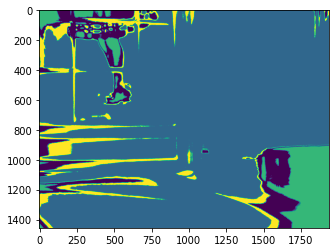

In [13]:
####finden der Lichtflecke by using clustering
#hier als Clusteralg. kmeans, später noch mit Kmediods and so on vergleichen (performance, korrektheit)

def cluster (np_a, n_cluster):
    kmeans = KMeans(n_clusters=n_cluster, random_state=2)
    kmeans_labels = kmeans.fit(np_a).labels_
    return kmeans_labels

exam_cluster = cluster(fit_ready, 4)
print(exam_cluster)

final_exam_cluster = exam_cluster.reshape(w, h, -1)
plt.imshow(final_exam_cluster)
plt.show()

(112500, 1)


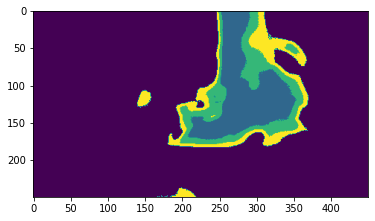

In [14]:
#test smaller image, Berechnugsdauer deutlich kürzer?
w, h = original_shape = tuple(middle.shape)
example_np_shaped = np.reshape(middle, (w * h, 1))
print(example_np_shaped.shape)

fit_ready = np.array(example_np_shaped, dtype=np.float64) / 255
exam_cluster = cluster(fit_ready, 4)

final_exam_cluster = exam_cluster.reshape(w, h, -1)
plt.imshow(final_exam_cluster)
plt.show()

- clustering auch bei kleinerem Bild zeitintensive
- Daten vorbereiten (reshaping): zeitintensiv
- nochmal checken, vielleicht mit anderem Datenformat (x-Achsenwert, y-Achsenwert, Farbwert) anderes Ergbnis

weitere Idee: Clustering nutzen um verschiede graustufungsgruppen zu finden, von denen die größte auswählen und deren wertebereich nehmen und als "Hintergrund" Werte speichern und dann bei Labeln benutzen. 

anderer Ansatz: mit labeln

[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


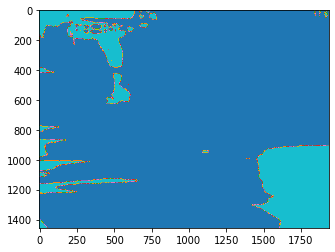

In [15]:
#label  example 
filtered_ex = (reshape_example_np_a < 151 ) # Wahl für Schwellwert schwierig 
print(filtered_ex)
plt.imshow(filtered_ex,cmap='tab10')
plt.show()

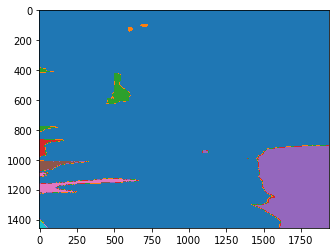

In [16]:
labeled_ex, num_label_ex = label (filtered_ex)
plt.imshow(labeled_ex,cmap='tab10')
plt.show()

In [17]:
#Idee um Schwellwert zu finden 

#Most frequent value in array:
import scipy.stats
scipy.stats.mode(reshape_example_np_a)[0][0][0]

# wenn alles weiß außer labels dann < Schwellwert, sonst > Schwellwert in Abfrage

255

1271


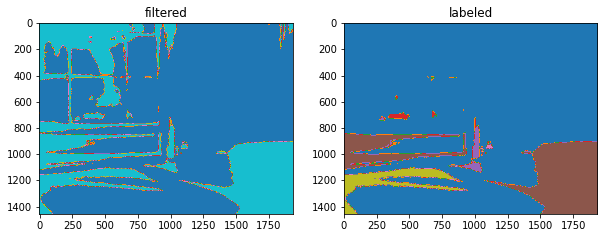

In [18]:
filtered_ex = (reshape_example_np_a < 255 ) # Schwellwert wie oben gewählt
labeled_ex, num_label_ex = label (filtered_ex)
print (num_label_ex)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(filtered_ex,cmap='tab10')
ax.set_title('filtered')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(labeled_ex,cmap='tab10')
ax.set_title('labeled')
plt.show()

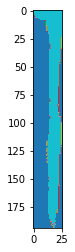

In [19]:
#slicing labeled image, so only the important part vor the object is left

image_part = find_objects(labeled_ex)[4]
plt.imshow(labeled_ex[image_part],cmap='tab10')
plt.show()


hier beim Bsp Bild noch über Tausend Labels und dementsprechend über tausend image parts
die Anzahhl der Parts sollte also beim Enderegebnis nochmal genau überprüft werden 

### connect to Fit-Gauß
erste Probeanalyse

<class 'numpy.ndarray'>
(1456, 1936, 3)
uint8


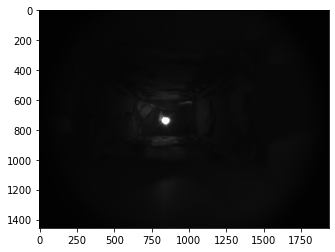

In [20]:
####erstes Probebild von Versuch 2 mit vimba software erzeugt
####Bild mit opencv laden

import cv2
im = cv2.imread('D:\\HZB\\BA_epics_camera\\Testaufbau\\Versuch2\\Stoff_im_Gang_Tuch_vor_Handy.bmp')

print(type(im))
print(im.shape)
print(im.dtype)

plt.imshow(im, cmap='gray')
plt.show()

(1456, 1936)
[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 3 2 2]
 [2 2 3 ... 2 2 2]
 [2 2 2 ... 2 3 2]]


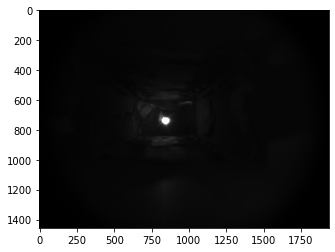

In [21]:
# reshape image, nachdem es nach dem Laden ausversehen in allen rgb Farben das gleiche stehen hat

def rgb2gray(Img):
    row,col,ch = Img.shape
    g = [ ]  
    for i in range(row) :
        a = []
        for j in range(col):
            a.append(Img[i,j,0])
        g.append(a)
    gr = np.array(g)
    return gr

grIm = rgb2gray(im)
print(grIm.shape)
print(grIm)
plt.imshow(grIm, cmap='gray')
plt.show()

Schwellwert: 2


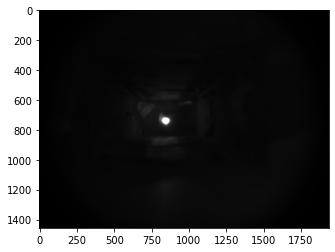

In [22]:
####label areas

#schwellwert finden 
print("Schwellwert:", scipy.stats.mode(grIm)[0][0][0])

#weitere Überlegung: outliers durch median filter ausbügeln -> Bild zwar verschwommen, aber dafür weniger falsche areas
#median_filter braucht länger Zeit
#wird im Folgenden nicht benutzt, beim testlauf damit wurde eindeutiges Ergebnis mit gleichem Schwellwert erzeugt
filt_im = median_filter(grIm, size=(20,20))
plt.imshow(filt_im,cmap='gray')
plt.show()

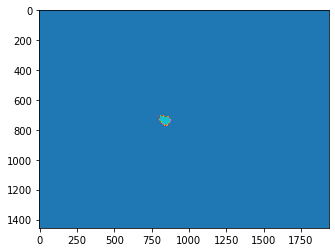

In [23]:
####bestimme entscheidende area und benutze nur noch die area of interest
####hier area of interest manuell, später mit algorithmus finden

filtered_im = (grIm > 70) # Schwellwert "> 2" hat zu viele label erzeugt, 
# weitere Idee "Segmentation with Gaussian mixture models"
# https://scipy-lectures.org/advanced/image_processing/auto_examples/plot_GMM.html#sphx-glr-advanced-image-processing-auto-examples-plot-gmm-py

plt.imshow(filtered_im,cmap='tab10')
plt.show()

4


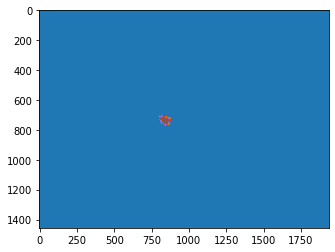

In [24]:
labeled_im, num_label_im= label (filtered_im)
print(num_label_im)
#print(labeled_im)
plt.imshow(labeled_im,cmap='tab10')
plt.show()

4
Index: 0


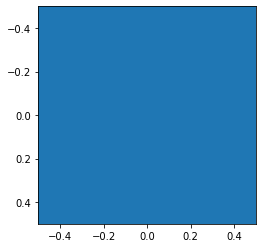

Index: 1


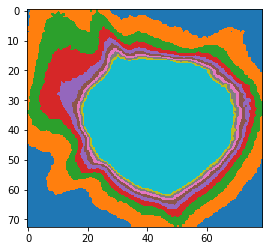

Index: 2


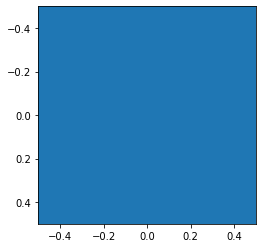

Index: 3


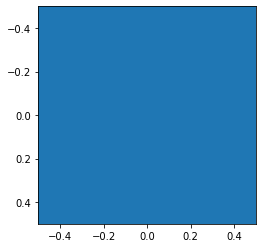

In [25]:
im_parts = find_objects(labeled_im)
# good_parts = []
# for parts in im_parts:
#     if labeled_im[parts].shape[0] > 100:
#         good_parts.append(parts)
len_parts = len(im_parts)
print(len_parts)

for i in range(0,len_parts):
    print("Index:", i)
    plt.imshow(grIm[im_parts[i]],cmap='tab10')
    plt.show()


  

--> Parameter die Einfluss auf das finden der besten Area haben beim labeln:
- median filter oder nicht (filter braucht zeit, aber eleminiert Outliers und liefert nur alle wichtigen Areas)
- Schwellwert (was gehört zu Lichtfleck, was nicht?) nur den häufigsten Wert des Bildes nehmen, liefert zu viele Areas, vlt "Segmentation with Gaussian mixture models" bei https://scipy-lectures.org/advanced/image_processing/auto_examples/plot_GMM.html#sphx-glr-advanced-image-processing-auto-examples-plot-gmm-py testen

--> weitere Gedanken:
- vlt Funktion finden, die schnell alle nicht wichtigen areas eleminiert Bsp "Clean up small connect components:" bei https://scipy-lectures.org/advanced/image_processing/#segmentation
- find_object schneidet area sehr eng ab, vlt immer noch die slices bis zum Rand vergrößern, wäre nochma eigene funktion, oder vlt durch recherche etwas finden 
- labeln allg. schneller als clustering, außer median filter, aber selbst der keine Wartezeiten wie clustering, kein reshapen 
- Idee wenn noch Zeit: mit timeit genau Berechnungszeiten überprüfen und in Tabelle darstellen 

(slice(701, 774, None), slice(801, 880, None))
(slice(651, 824, None), slice(751, 930, None))


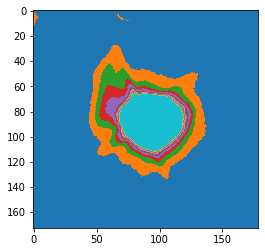

In [37]:
####Fit-Gauß Analyse für diesen Bereich 

#slice grIm nicely so wie durch labeln berechnet 
our_part = im_parts[1]
print(our_part)
new_slice = (slice(our_part[0].start - 50, our_part[0].stop + 50, None), 
             slice(our_part[1].start - 50, our_part[1].stop + 50, None))
print(new_slice)

plt.imshow(grIm[new_slice],cmap='tab10')
plt.show()

#später noch überlegen was mit parts am Rand ist!

In [ ]:
# visualize in 3D

# fit gauß